# Análisis de performance de agentes

In [61]:
import Agents
import random
import pandas as pd
import seaborn as sns

## Se llevará a cabo con la siguiente configuración:

In [62]:
agent_types = [Agents.SimpleReflexAgent, Agents.DumbAgent]
sizes = [2, 4, 8, 16, 32, 64, 128]
dirt_rates = [.1, .2, .4, .8]
agent_life = 1000
iterations = 30
random.seed(42)

---

## Correr simulación

In [63]:
# fn
def execute_simulation(agent_class: Agents.Agent.__class__, size, dirt_rate, life):
    # Initialize objects
    env = Agents.Environment(size, size, random.randint(0, size-1), random.randint(0, size-1), dirt_rate)
    agent = agent_class(env)

    # Simulate life
    while life > 0 and env.initial_dirt > env.cleaned_slots:
        agent.think()
        life -= 1

    # Return results as a dict
    return {
        'agent_type': agent_class.__name__,
        'size': size,
        'dirt_rate': dirt_rate,
        'initial_dirt': env.initial_dirt,
        'cleaned_slots': env.cleaned_slots,
        'cleaned_rate': env.cleaned_slots / env.initial_dirt if env.initial_dirt else 1,
        'remaining_life': life
    }

# Simulate and save results of each case
simulation_list = []

for agent_type in agent_types:
    for size in sizes:
        for dirt_rate in dirt_rates:
            for i in range(iterations):
                simulation_list.append(execute_simulation(agent_type, size, dirt_rate, agent_life))

# Print table
simulation_df = pd.DataFrame(simulation_list)
simulation_df

,agent_type,size,dirt_rate,initial_dirt,cleaned_slots,cleaned_rate,remaining_life
0,SimpleReflexAgent,2,0.1,0,0,1.000000,1000
1,SimpleReflexAgent,2,0.1,2,2,1.000000,993
2,SimpleReflexAgent,2,0.1,0,0,1.000000,1000
3,SimpleReflexAgent,2,0.1,2,2,1.000000,989
4,SimpleReflexAgent,2,0.1,0,0,1.000000,1000
...,...,...,...,...,...,...,...
1675,DumbAgent,128,0.8,13097,94,0.007177,0
1676,DumbAgent,128,0.8,13098,106,0.008093,0
1677,DumbAgent,128,0.8,13187,108,0.008190,0
1678,DumbAgent,128,0.8,13108,84,0.006408,0


## Análisis de cada configuración

In [64]:
samples_list = []

for agent_type in agent_types:
    for size in sizes:
        for dirt_rate in dirt_rates:
            sample_df = simulation_df.query(f'agent_type == "{agent_type.__name__}" and size == {size} and dirt_rate == {dirt_rate}')

            samples_list.append({
                'agent_type': agent_type.__name__,
                'size': size,
                'dirt_rate': dirt_rate,
                'initial_dirt_avg': sample_df['initial_dirt'].mean(),
                'initial_dirt_std': sample_df['initial_dirt'].std(),
                'cleaned_slots_avg': sample_df['cleaned_slots'].mean(),
                'cleaned_slots_std': sample_df['cleaned_slots'].std(),
                'cleaned_rate_avg': sample_df['cleaned_rate'].mean(),
                'cleaned_rate_std': sample_df['cleaned_rate'].std(),
                'remaining_life_avg': sample_df['remaining_life'].mean(),
                'remaining_life_std': sample_df['remaining_life'].std(),
            })

samples_df = pd.DataFrame(samples_list)
samples_df

,agent_type,size,dirt_rate,initial_dirt_avg,initial_dirt_std,cleaned_slots_avg,cleaned_slots_std,cleaned_rate_avg,cleaned_rate_std,remaining_life_avg,remaining_life_std
0,SimpleReflexAgent,2,0.1,0.500000,0.820008,0.500000,0.820008,1.000000,0.000000,997.766667,4.280536
1,SimpleReflexAgent,2,0.2,0.666667,0.758098,0.666667,0.758098,1.000000,0.000000,997.433333,4.264394
2,SimpleReflexAgent,2,0.4,1.600000,0.770132,1.600000,0.770132,1.000000,0.000000,993.066667,6.689845
3,SimpleReflexAgent,2,0.8,3.333333,0.958927,3.333333,0.958927,1.000000,0.000000,990.533333,5.070084
4,SimpleReflexAgent,4,0.1,1.466667,1.279368,1.466667,1.279368,1.000000,0.000000,968.500000,44.903536
5,SimpleReflexAgent,4,0.2,3.533333,1.591645,3.533333,1.591645,1.000000,0.000000,952.233333,36.623606
6,SimpleReflexAgent,4,0.4,5.266667,1.946408,5.266667,1.946408,1.000000,0.000000,929.700000,55.185674
7,SimpleReflexAgent,4,0.8,12.766667,1.695498,12.766667,1.695498,1.000000,0.000000,890.966667,47.275045
8,SimpleReflexAgent,8,0.1,6.166667,2.320573,6.133333,2.359622,0.991667,0.045644,658.133333,229.002294
9,SimpleReflexAgent,8,0.2,12.233333,3.036370,12.166667,3.063504,0.993915,0.023735,508.966667,213.037229


## Gráficos
### Box plot - Performance SimpleReflexAgent y DumbAgent en cada configuración
cleaned_rate varía de 0 a 1, en función del porcentaje de suciedad que el agente limpió del total de suciedad. $cleaned\_rate = \frac{cleaned\_slots}{initial\_dirt}$

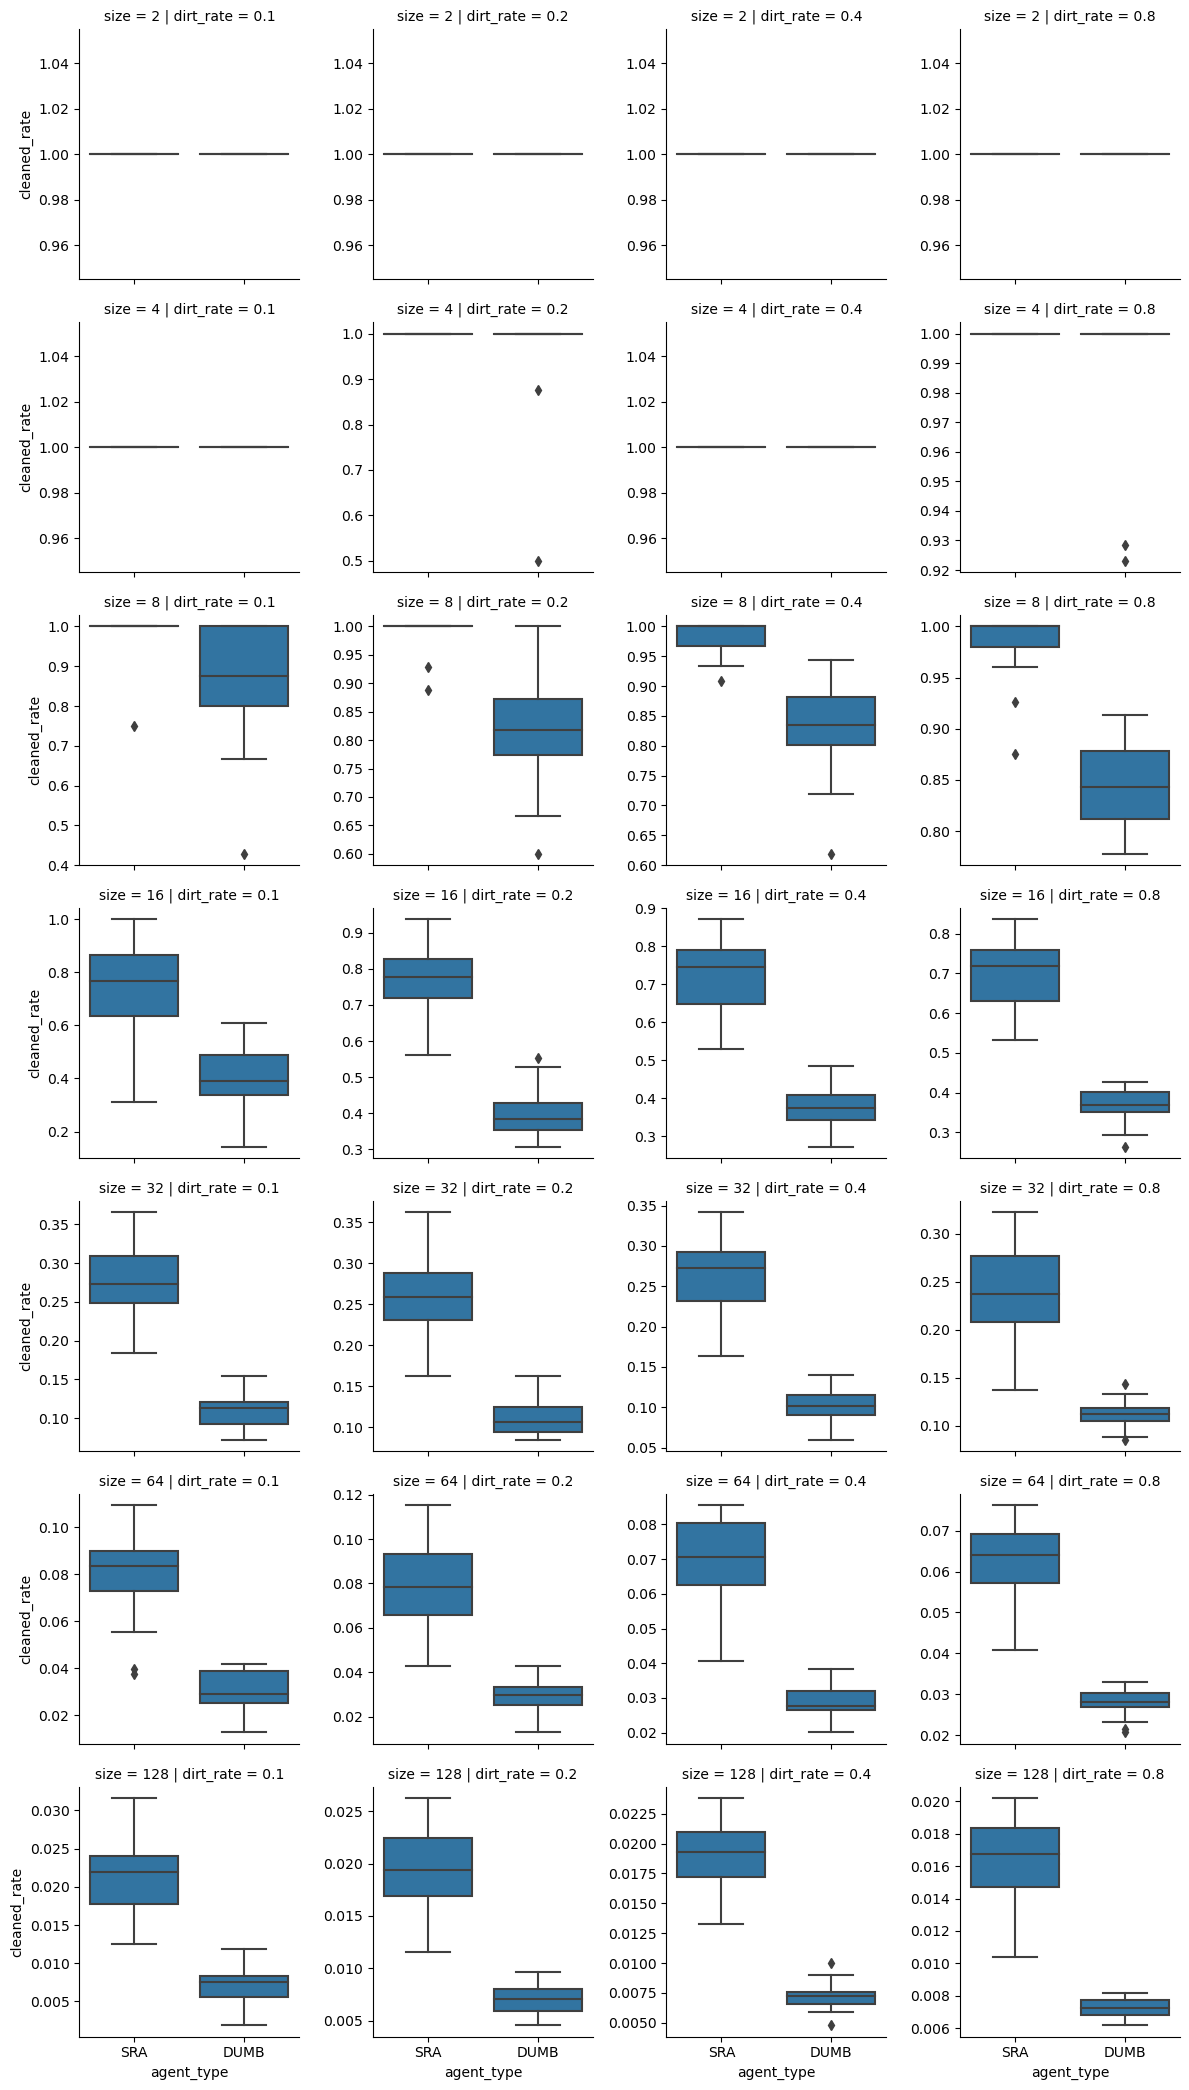

In [65]:
grid = sns.FacetGrid(data=simulation_df,
                     row='size',
                     col='dirt_rate',
                     sharey=False)
grid.map(sns.boxplot, 'agent_type', 'cleaned_rate', order= [x.__name__ for x in agent_types])
grid.set_xticklabels(['SRA', 'DUMB'])

### Lineplot del performance (cleaned_rate) según el tamaño (size)
_Eje y en escala logarítmica_

[None]

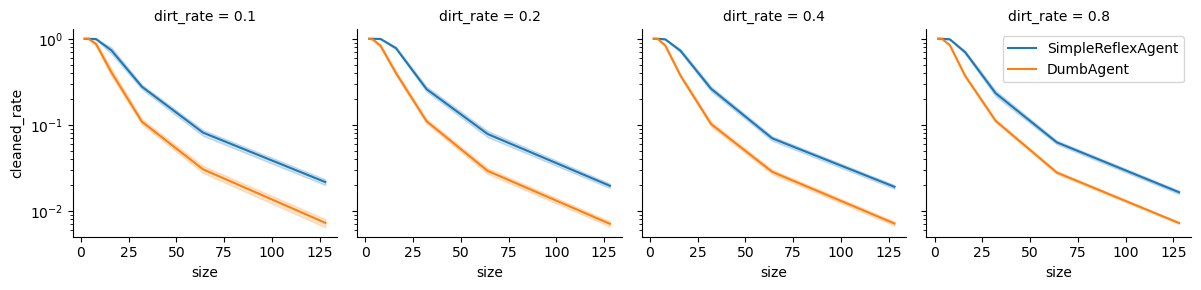

In [66]:
grid2 = sns.FacetGrid(data=simulation_df, col='dirt_rate', )
grid2.map(sns.lineplot, 'size', 'cleaned_rate', 'agent_type')
grid2.axes[0][-1].legend()
grid2.axes[0][0].set(yscale='log')